# Regression Discontinuity Design

## Loading the data

In [24]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np

import statsmodels.formula.api as smf
import seaborn as sns

### Step 1

In [6]:
rdd_df = pd.read_csv("./rdd_data.csv")

### Step 2

In [7]:
rdd_df.head()

,spend_1m_baby,spend_2m_baby,spend_3m_baby,spend_4m_baby,spend_5m_baby,spend_6m_baby,spend_1m_clothes,spend_2m_clothes,spend_3m_clothes,spend_4m_clothes,...,spend_4m_eletronic,spend_5m_eletronic,spend_6m_eletronic,sales,discount,profit,age,gender,cust_state,tenure
0,5,0,0,0,10,0.0,0,0.0,0.0,0.0,...,0.0,0.0,0.0,1442.30,$ 4.0,66.93,30,0.0,MA,19
1,0,0,0,0,0,0.0,0,0.0,0.0,0.0,...,0.0,0.0,0.0,883.96,$ 2.0,41.33,30,1.0,MG,20
2,0,0,0,0,0,0.0,0,0.0,0.0,0.0,...,0.0,0.0,0.0,4900.67,$ 224.0,15.88,29,0.0,RJ,21
3,0,0,0,0,0,0.0,25,25.0,0.0,25.0,...,0.0,0.0,0.0,1547.48,$ 1.0,74.99,36,1.0,BA,18
4,0,0,0,0,0,0.0,0,0.0,0.0,0.0,...,0.0,0.0,0.0,1335.23,$ 13.0,52.41,37,0.0,PB,19


In [8]:
def sniff(df):
  """
  Function identifies the datatype and also calculates the percentage of missing values of all columns of input dataframe 

  Parameter and type: 
    df(Pandas Dataframe): Dataframe

  Return:
    :rtype: Dataframe 
    :return: Dataframe with column names, their datatypes and percentage of missing values, sorted by data types 

  """
  with pd.option_context("display.max_colwidth", 20):
    info = pd.DataFrame()
    info['sample'] = df.iloc[0]
    info['data type'] = df.dtypes
    info['percent missing'] = df.isnull().sum()*100/len(df)
    return info.sort_values('data type')

In [9]:
sniff(rdd_df)

,sample,data type,percent missing
spend_1m_baby,5,int64,0.0
age,30,int64,0.0
spend_3m_eletronic,0,int64,0.0
spend_2m_eletronic,0,int64,0.0
spend_1m_eletronic,0,int64,0.0
spend_2m_groceries,180,int64,0.0
spend_1m_groceries,55,int64,0.0
spend_6m_pet,0,int64,0.0
spend_5m_pet,0,int64,0.0
spend_3m_pet,0,int64,0.0


In [11]:
#cleaning the discount column and converting it to numeric
rdd_df['discount'] = rdd_df['discount'].str.split(" ").str[1].astype('float64')

### Identifying the running variable

In [25]:
def discontinuity_check(df,running_var):

    grouped_df = df.groupby(running_var).agg({"discount":"mean"}).reset_index()
    return grouped_df


In [26]:
numeric_cols = []
invalid_cols = ['profit','sales','discount','cust_state']
numeric_types = ['int8','int32','int64','float16','float32','float64']
for col,type in zip(rdd_df.columns,rdd_df.dtypes):
    if type in numeric_types and col not in invalid_cols:
        numeric_cols.append(col)

print(len(numeric_cols))

39


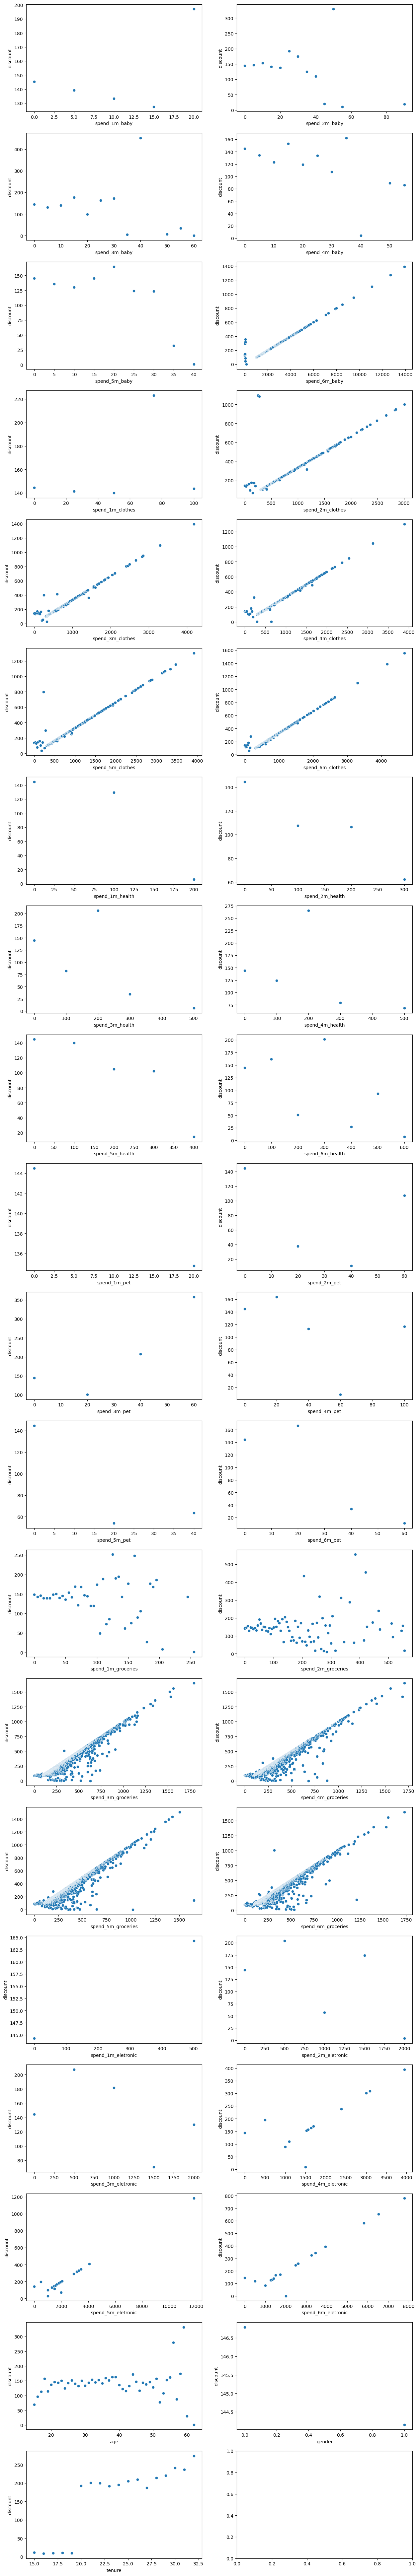

In [41]:
dims = (20,2)

f, axes = plt.subplots(dims[0], dims[1], figsize=(15,100))
axis_i, axis_j = 0, 0
for col in numeric_cols:
  df = discontinuity_check(rdd_df,col)
  sns.scatterplot(x=col,y="discount",data = df,ax=axes[axis_i, axis_j])
  axis_j += 1
  if axis_j == dims[1]:
    axis_i += 1
    axis_j = 0

There is a clear discount discontinuity by tenure. It looks like a discount increase at a tenure of 20 months. There isn’t any clear discontinuity in any other variable we’ve looked at. 

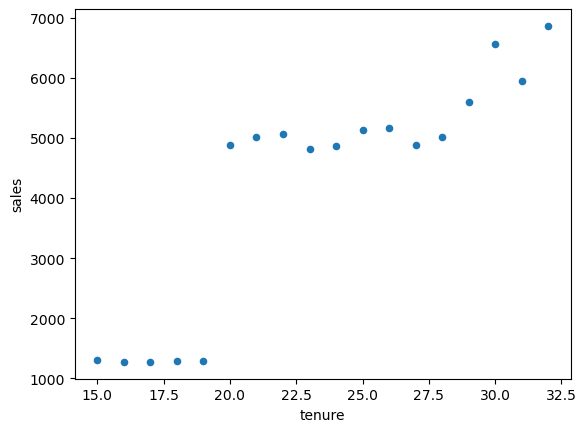

In [44]:
running_var = "tenure"

group_rdd = rdd_df.groupby(running_var).agg({"sales":"mean"}).reset_index()
group_rdd.plot.scatter(x=running_var, y="sales");

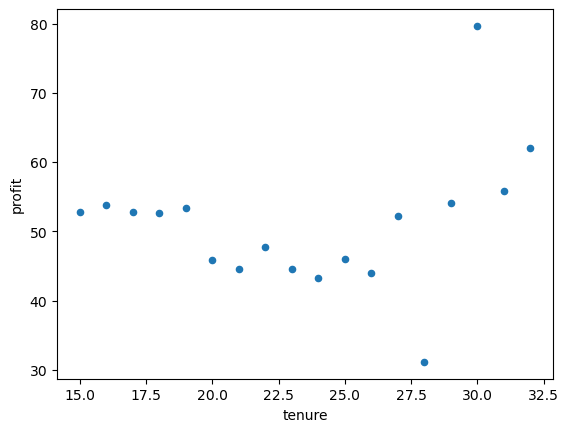

In [46]:
running_var = "tenure"

group_rdd = rdd_df.groupby(running_var).agg({"profit":"mean"}).reset_index()
group_rdd.plot.scatter(x=running_var, y="profit");

Just like we saw a discontinuity in discount around tenure 20, there is a clear discontinuity in sales. Sales also increase dramatically once customers reach 20 month tenure. This is probably the effect of increasing discounts. On the other hand, when we look at profits, it seems that it decreases at the discontinuity. That is, customers just above tenure 20 are generating less profits than customers just below it. This probably indicates that the effect of discount on profits is negative
 
 
### McCrary Test for Bunching


In [47]:
rdd_dataset

,spend_1m_baby,spend_2m_baby,spend_3m_baby,spend_4m_baby,spend_5m_baby,spend_6m_baby,spend_1m_clothes,spend_2m_clothes,spend_3m_clothes,spend_4m_clothes,...,spend_4m_eletronic,spend_5m_eletronic,spend_6m_eletronic,sales,discount,profit,age,gender,cust_state,tenure
0,5,0,0,0,10,0.0,0,0.0,0.0,0.0,...,0.0,0.0,0.0,1442.30,4.0,66.93,30,0.0,MA,19
1,0,0,0,0,0,0.0,0,0.0,0.0,0.0,...,0.0,0.0,0.0,883.96,2.0,41.33,30,1.0,MG,20
2,0,0,0,0,0,0.0,0,0.0,0.0,0.0,...,0.0,0.0,0.0,4900.67,224.0,15.88,29,0.0,RJ,21
3,0,0,0,0,0,0.0,25,25.0,0.0,25.0,...,0.0,0.0,0.0,1547.48,1.0,74.99,36,1.0,BA,18
4,0,0,0,0,0,0.0,0,0.0,0.0,0.0,...,0.0,0.0,0.0,1335.23,13.0,52.41,37,0.0,PB,19
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,0,0,0,0,0,0.0,0,0.0,0.0,0.0,...,0.0,0.0,0.0,5338.60,252.0,9.33,40,0.0,MG,23
9996,10,0,5,25,15,0.0,0,0.0,0.0,0.0,...,0.0,0.0,0.0,5312.73,257.0,3.22,31,1.0,PE,21
9997,0,0,0,0,0,0.0,0,0.0,0.0,0.0,...,0.0,0.0,0.0,1234.71,35.0,25.32,23,0.0,SC,22
9998,0,0,0,0,0,0.0,25,0.0,50.0,0.0,...,0.0,0.0,0.0,3753.06,136.0,47.41,25,0.0,SP,21


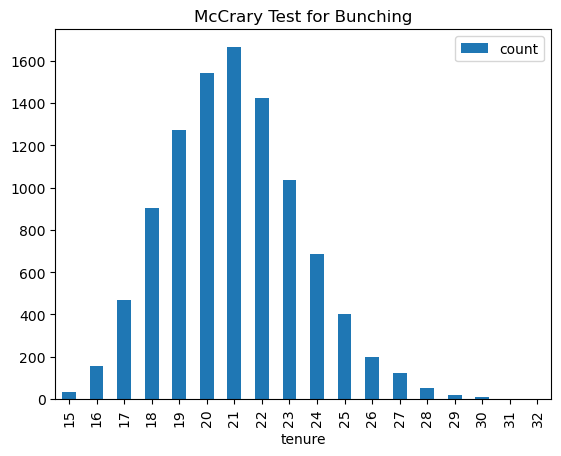

In [48]:
group_rdd = (rdd_dataset.assign(count=1).groupby(running_var).agg({"count": "sum"}).reset_index())

group_rdd.plot.bar(y="count", x="tenure")

plt.title("McCrary Test for Bunching");

There is no evidence of bunching. The histogram is smooth around the 20 month tenure. This is expected, as customers can't manipulate their tenure. 

## Regression Discontinuity Design

### Fitting discount as f(tenure) for above & below threshold

In [60]:
tresh = 19
rdd_centered = rdd_df.assign(tenure=rdd_df["tenure"]-tresh)
rdd_centered["above_threshold"] = (rdd_centered["tenure"] > 0).astype(int)

rdd_centered.head()

,spend_1m_baby,spend_2m_baby,spend_3m_baby,spend_4m_baby,spend_5m_baby,spend_6m_baby,spend_1m_clothes,spend_2m_clothes,spend_3m_clothes,spend_4m_clothes,...,spend_5m_eletronic,spend_6m_eletronic,sales,discount,profit,age,gender,cust_state,tenure,above_threshold
0,5,0,0,0,10,0.0,0,0.0,0.0,0.0,...,0.0,0.0,1442.30,4.0,66.93,30,0.0,MA,0,0
1,0,0,0,0,0,0.0,0,0.0,0.0,0.0,...,0.0,0.0,883.96,2.0,41.33,30,1.0,MG,1,1
2,0,0,0,0,0,0.0,0,0.0,0.0,0.0,...,0.0,0.0,4900.67,224.0,15.88,29,0.0,RJ,2,1
3,0,0,0,0,0,0.0,25,25.0,0.0,25.0,...,0.0,0.0,1547.48,1.0,74.99,36,1.0,BA,-1,0
4,0,0,0,0,0,0.0,0,0.0,0.0,0.0,...,0.0,0.0,1335.23,13.0,52.41,37,0.0,PB,0,0


In [61]:
model = smf.ols("discount~tenure*above_threshold", rdd_centered).fit()

model.summary().tables[1]

,coef,std err,t,P>|t|,[0.025,0.975]
Intercept,10.0302,4.213,2.381,0.017,1.771,18.290
tenure,0.1118,3.263,0.034,0.973,-6.285,6.508
above_threshold,184.7626,5.696,32.436,0.000,173.597,195.928
tenure:above_threshold,0.8269,3.430,0.241,0.809,-5.896,7.550


Fitting a linear regression interacting tenure with the threshold dummy 
 
$$
discount_i = \beta_0 + \beta_1 tenure_i + \beta_2 \mathcal{1}_{tenure>19} + \beta_3 \mathcal{1}_{tenure>19} * threshold_i
$$
 
is equivalent to fitting two regression models: one above and another below the threshold. 
- $\beta_0$ is the intercept for the model below the threshold. 
- $\beta_0$ + $\beta_2$ is the intercept for the model above the threshold. 
- Hence, $\beta_2$ is the jump we have from crossing the threshold. This is exactly the treatment effect we are looking for. 
 
This means that crossing the 20th month threshold increases discount by about `184` (95% CI between 173	and 195). This is a statistically significant difference.

### Visualizing the discount predictions

In [58]:
rdd_group_pred = rdd_centered.groupby("tenure")[["discount","above_threshold"]].mean().reset_index()

rdd_group_pred["predictions"] = model.predict(rdd_group_pred)

rdd_group_pred.head()

,tenure,discount,above_threshold,predictions
0,-4,11.606061,0.0,9.582855
1,-3,8.721519,0.0,9.694702
2,-2,9.633262,0.0,9.806550
3,-1,10.313053,0.0,9.918397
4,0,9.882168,0.0,10.030244


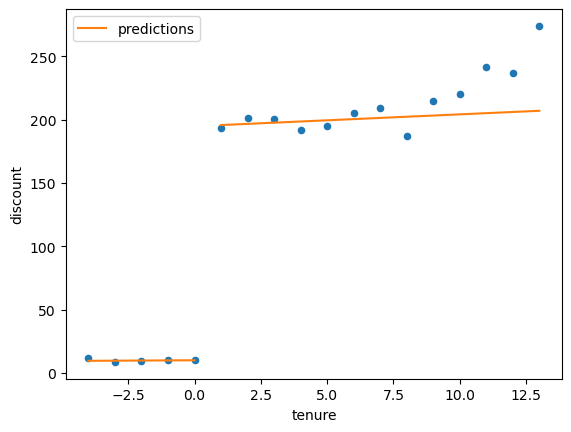

In [59]:

ax = rdd_group_pred.plot.scatter(x="tenure", y="discount", color="C0")
rdd_group_pred.query("above_threshold<=0").plot(x="tenure", y="predictions", ax=ax, color="C1")
rdd_group_pred.query("above_threshold>0").plot(x="tenure", y="predictions", ax=ax, color="C1", legend=False);

### Fitting Profit as f(tenure) for above & below threshold

In [64]:
model = smf.ols("profit~tenure*above_threshold", rdd_centered).fit()

model.summary().tables[1]

,coef,std err,t,P>|t|,[0.025,0.975]
Intercept,53.1927,1.208,44.046,0.000,50.825,55.560
tenure,0.1294,0.935,0.138,0.890,-1.704,1.963
above_threshold,-7.6015,1.633,-4.656,0.000,-10.802,-4.401
tenure:above_threshold,-0.1608,0.983,-0.164,0.870,-2.088,1.766


crossing the 20th month threshold decreases profits by about `7.6`. In other words, the impact of discounts on profits is negative. The company is losing money by giving discounts. This is a statistically significant difference. Since crossing the threshold increases discount by about 184 and decreases profits by about 7.6, we should expect each \\\$ spend in discount to decrease profits by about 5 cents.

### Visualizing the profit predictions

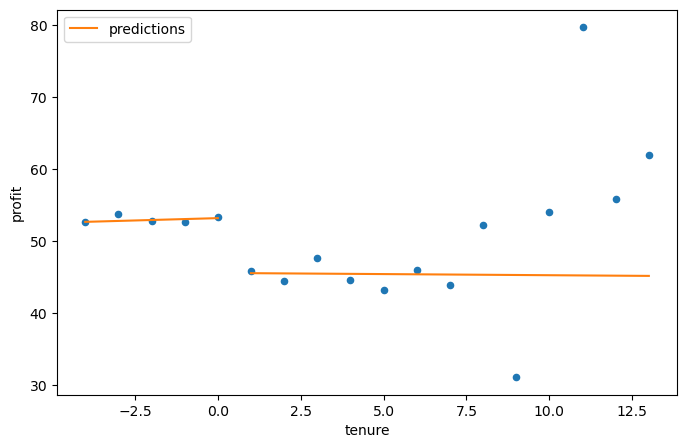

In [66]:
rdd_group_pred = (rdd_centered.groupby("tenure")[["profit","above_threshold"]].mean().reset_index())

rdd_group_pred["predictions"] = model.predict(rdd_group_pred)
                

ax = rdd_group_pred.plot.scatter(x="tenure", y="profit", color="C0")
rdd_group_pred.query("above_threshold<=0").plot(x="tenure", y="predictions", ax=ax, color="C1", figsize=(8,5))
rdd_group_pred.query("above_threshold>0").plot(x="tenure", y="predictions", ax=ax, color="C1", legend=False);

Regression discontinuity design relies heavily on the extrapolation powers of regression. In other words, we have to fit the edge of the regression line, close to the discontinuity, much better than the other points. This can be tough if your data has weird nonlinearities or is denser in regions away from the threshold. In these cases, we can end up with a poor fit of the threshold and, hence, with a biased estimator of the treatment effect. There are multiple ways of solving this issue, like fitting a polynomial regression. But the one we like the most is to simply use a kernel to down weight samples that are far from the threshold.